In [1]:
# 텍스트전처리 -1
# 빈도분석 - 2
# 군집분석 - 3

In [ ]:
# 군집분석
# - y값(label라고 부르는 예측 대상이 없이, 유사한 데이터끼리 묶어주는 알고리즘)
# - 비지도학습(unsupervised learning)
# - kmeans(거리기반), agglomerative clustering(계층적 군집분석), DBSCAN(밀도기반)
# - 군집분석 평가 : silhouette
# - 문서에서 군집분석 : 유사한 문서끼리 묶어주는 작업..

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# colab 
# chrome > 구글계정로그인 > 구글검색 : "colab" > 새노트 > 파일 > .ipynb다운로드

In [3]:
from konlpy.tag import Hannanum 
from sklearn.feature_extraction.text import CountVectorizer  # 문서를 벡터로 변환..
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans

In [4]:
han = Hannanum()

In [5]:
data = pd.read_excel('./files/clustering_data.xlsx')
data

,검색어,기사내용
0,유한양행,유한양행은 얀센 바이오테크(Janssen Biotech Inc)와 EGFR표적 항암...
1,유한양행,유한양행이 1조4000억원 규모의 기술이전 계약 체결 소식에 가격제한폭까지 치솟았다...
2,유한양행,유한양행이 다국적 제약사 얀센에 기술수출했다는 소식에 주가가 5일 장 초반 상한가를...
3,유한양행,"유한양행은 얀센 바이오테크((Janssen Biotech, Inc.)와 EGFR(상..."
4,유한양행,유한양행이 1조4000억원 규모 기술 수출 소식에 가격제한폭까지 치솟았다. 유한양행...
5,라돈,"최근 침대 매트리스에 이어 온수매트에서도 라돈이 검출됐다는 소식이 알려지면서, 가정..."
6,라돈,"침대, 생리대, 마스크 등에서 라돈이 검출되면서, 발암 물질 ‘라돈’에 대한 관심..."
7,라돈,하이젠 온수매트가 '라돈 온수매트'로 언급되고 있다.\n최근 한 온라인커뮤니티에서는...
8,라돈,겨울 난방 제품인 온수매트에서 라돈이 검출된 가운데 해당 업체가 별 문제가 되지 않...
9,라돈,"매트리스, 생리대에 이어 온수 매트에서도 라돈이 검출돼 이슈로 떠올랐다.\n5일 오..."


In [6]:
data['기사내용'][2]

'유한양행이 다국적 제약사 얀센에 기술수출했다는 소식에 주가가 5일 장 초반 상한가를 찍었다. \n유한양행은 이날 오전 9시 5분 현재 유가증권시장에서 전 거래일보다 5만3000원(29.78%) 오른 23만1000원에 거래되고 있다. \n앞서 유한양행은 얀센 바이오테크 (Janssen Biotech, Inc.)와 상피세포 성장인자 수용체 표적 항암 치료제 기술을 이전하는 계약을 체결했다고 이날 장 개장 전 공시했다.\n이번 계약금은 5000만 달러, 개발 및 상업화까지 단계별 기술료(마일스톤)는 12억500만 달러로, 총 기술수출 규모는 12억5500만 달러(약 1조4000억원)에 이른다. \n서근희 삼성증권 연구원은 "유한양행의 이번 기술수출 계약 소식은 한미약품 이후 기술 이전 계약에 목마른 투자자들의 갈증을 해소해줄 전망"이라며 "한미약품과 사노피 기술 이전 계약 체결 이후 2번째로 큰 계약 규모이다"라고 말했다.\n'

In [7]:
data['기사내용'][7]

'하이젠 온수매트가 \'라돈 온수매트\'로 언급되고 있다.\n최근 한 온라인커뮤니티에서는 하이젠 온수매트 구매 후 아이가 기침을 했다는 골자의 게시물이 업로드돼 시선을 모았다. 글쓴이는 라돈 아이를 대여해 측정한 결과 하이젠 온수매트에서 라돈 16.9pCi/L가 나왔다고 알렸다.\n이에 하이젠 온수매트를 사용하고 있던 이들은 라돈 측정기를 대여해 라돈을 측정했고, 환경부의 권고를 웃도는 라돈이 검출된 것을 확인해 충격을 자아냈다.\n이에 하이젠 온수매트 제조사 (주)대현하이텍은 (주)알엔테크를 통해 진행한 라돈 측정시험결과표 검사 결과를 공지하며 소비자들의 불안한 마음을 달랬다. (주) 대현하이텍은 "불편함을 느끼시는 분들에게는 기본 매트를 신규 매트로 교환해주겠다"는 입장을 전달한 상태다.\n한편 하이젠 온수매트 라돈 검출 논란 직후 소비자들은 포털사이트 네이버에 \'온수매트 라돈피해\'라는 카페를 만들어 각자의 정보를 교환하고 있다.\n이곳에는 \'화가 난다\', \'고객센터 연락이 안 된다\'는 글이 잇따라 게재돼 누리꾼들의 이목이 집중되고 있다.'

In [8]:
data['기사내용'][12]

'지난 4일 방송된 MBC ‘복면가왕’에서는 왕밤빵에 맞서 축음기, 조커, 북극곰 버블버블이 대결을 펼쳤다.\n2라운드 첫 번째 대결은 축음기와 조커였다. 축음기는 임정희의 ‘진짜일 리 없어’를, 조커는 헤이즈의 ‘저 별’을 불렀다. 승자는 축음기였고 조커의 정체는 워너원의 멤버 이대휘였다.\n2라운드 두 번째 대결은 북극곰과 버블버블의 무대였다. 북극곰은 빅마마의 ‘Break Away’를, 버블버블은 크러쉬의 ‘Beautiful’을 불렀다. 승자는 버블버블이었고 북극곰의 정체는 가수 이기찬이었다.\n3라운드에서는 축음기와 버블버블이 맞붙었다. 축음기는 박정현의 ‘미아’를 버블버블은 이승환의 ‘천일동안’을 선곡했다. 승자는 축음기였고 버블버블의 정체는 가수 라디였다.\n마지막 무대는 왕밤빵의 가왕방어전이었다. 왕밤빵은 이적의 ‘Rain’를 선택했다. 이번에도 가왕 자리를 지켰고 축음기의 정체는 코러스가수 출신의 천단비였다.\n누리꾼들은 2연승을 차지한 왕밤빵이 가수 김용진 또는 뮤지일 것이라 추측하고 있다. '

In [9]:
han.nouns(data['기사내용'][12])

['4일',
 '방송',
 '‘복면가왕’에서',
 '왕밤빵',
 '축음기',
 '조커',
 '북극곰',
 '버블버블',
 '대결',
 '2라운드',
 '첫',
 '번',
 '대결',
 '축음기',
 '조커',
 '축음기',
 '임정희',
 '‘진짜',
 '리',
 '없어’를,',
 '조커',
 '헤이즈',
 '‘저',
 '별’',
 '승자',
 '축음기',
 '조커',
 '정체',
 '워너원',
 '멤버',
 '이대휘',
 '2라운드',
 '두',
 '번',
 '대결',
 '북극곰',
 '버블버블',
 '무대',
 '북극곰',
 '빅마마',
 '‘Break',
 'Away’를,',
 '버블버블',
 '크러쉬',
 '‘Beautiful’',
 '승자',
 '버블버블',
 '북극곰',
 '정체',
 '가수',
 '이기찬',
 '3라운드에서',
 '축음기',
 '버블버블',
 '축음기',
 '박정현',
 '‘미아’',
 '버블버블',
 '이승환',
 '‘천일동안’',
 '선곡',
 '승자',
 '축음기',
 '버블버블',
 '정체',
 '가수',
 '라디',
 '마지막',
 '무대',
 '왕밤빵',
 '가왕방어전',
 '왕밤빵',
 '이적',
 '‘Rain’',
 '선택',
 '이번',
 '가왕',
 '자리',
 '축음기',
 '정체',
 '코러스가수',
 '출신',
 '천단비',
 '누리꾼들',
 '2연승',
 '왕밤빵',
 '가수',
 '김용진',
 '뮤지',
 '것',
 '추측']

In [10]:
' '.join(han.nouns(data['기사내용'][12]))

'4일 방송 ‘복면가왕’에서 왕밤빵 축음기 조커 북극곰 버블버블 대결 2라운드 첫 번 대결 축음기 조커 축음기 임정희 ‘진짜 리 없어’를, 조커 헤이즈 ‘저 별’ 승자 축음기 조커 정체 워너원 멤버 이대휘 2라운드 두 번 대결 북극곰 버블버블 무대 북극곰 빅마마 ‘Break Away’를, 버블버블 크러쉬 ‘Beautiful’ 승자 버블버블 북극곰 정체 가수 이기찬 3라운드에서 축음기 버블버블 축음기 박정현 ‘미아’ 버블버블 이승환 ‘천일동안’ 선곡 승자 축음기 버블버블 정체 가수 라디 마지막 무대 왕밤빵 가왕방어전 왕밤빵 이적 ‘Rain’ 선택 이번 가왕 자리 축음기 정체 코러스가수 출신 천단비 누리꾼들 2연승 왕밤빵 가수 김용진 뮤지 것 추측'

In [11]:
docs = []
for i in data['기사내용']:
    docs.append(han.nouns(i))
docs

[['유한양행',
  '얀센',
  '바이오테크(Janssen',
  '표적',
  '항암',
  '치료제',
  '기술이전',
  '계약',
  '체결',
  '5일',
  '공시',
  '기술수출금액',
  '12억5500만달러(한화',
  '약',
  '1조3416억원',
  '계약금',
  '5000만달러',
  '개발',
  '허가',
  '매출',
  '단계별',
  '마일스톤',
  '12억500만달러',
  '수령',
  '예정',
  '경상기술료',
  '순매출액',
  '책정',
  '유한양행',
  '관계자',
  '기술이전',
  '계약',
  '수익',
  '식',
  '임상시험',
  '허가',
  '등',
  '성공여부',
  '수',
  '미실현',
  '가능성'],
 ['유한양행',
  '1조4000억원',
  '규모',
  '기술이전',
  '계약',
  '체결',
  '소식',
  '가격제한폭',
  '5일',
  '오전',
  '9시',
  '3분',
  '유한양행',
  '전날',
  '5만3000원(29.',
  '78',
  '23만1000원',
  '거래',
  '사흘',
  '연속',
  '강세',
  '유한양행',
  '글로벌',
  '제약사',
  '존슨앤존슨(J&J)',
  '자회사',
  '얀센',
  '바이오테크(Janssen',
  '저해제',
  '‘레이저티닙’(프로젝트명',
  'YH25448)',
  '기술수출',
  '계약',
  '체결',
  '이날',
  '계약규모',
  '약',
  '1조4000억원(12억5500만달러)',
  '반환',
  '의무',
  '계약금',
  '560억원(5000',
  '이번',
  '계약',
  '얀센',
  '전세계',
  '레이저티닙',
  '개발',
  '제조',
  '상업화',
  '독점적',
  '권리',
  '국내',
  '개발',
  '상업화',
  '권리',
  '유한양행',
  '유',
  '유한양행',
  '얀센',
  '바이오텍',
  '내

In [12]:
len(docs)

15

In [13]:
for i in range(len(docs)):
    docs[i] = ' '.join(docs[i])
docs

['유한양행 얀센 바이오테크(Janssen 표적 항암 치료제 기술이전 계약 체결 5일 공시 기술수출금액 12억5500만달러(한화 약 1조3416억원 계약금 5000만달러 개발 허가 매출 단계별 마일스톤 12억500만달러 수령 예정 경상기술료 순매출액 책정 유한양행 관계자 기술이전 계약 수익 식 임상시험 허가 등 성공여부 수 미실현 가능성',
 '유한양행 1조4000억원 규모 기술이전 계약 체결 소식 가격제한폭 5일 오전 9시 3분 유한양행 전날 5만3000원(29. 78 23만1000원 거래 사흘 연속 강세 유한양행 글로벌 제약사 존슨앤존슨(J&J) 자회사 얀센 바이오테크(Janssen 저해제 ‘레이저티닙’(프로젝트명 YH25448) 기술수출 계약 체결 이날 계약규모 약 1조4000억원(12억5500만달러) 반환 의무 계약금 560억원(5000 이번 계약 얀센 전세계 레이저티닙 개발 제조 상업화 독점적 권리 국내 개발 상업화 권리 유한양행 유 유한양행 얀센 바이오텍 내년 레이저티닙 단일요법 병용요법 글로벌 임상시험 공동 진행 예정 유한양행 개발 허가 상업화 성공 단계별 마일스톤 기술료 12억500 달러(약 1조3500억원 수 임상시험 허가 상업화 실패 경우 기술이전 계약 종료 경우 유한양행 얀센 측 지급 위약금',
 '유한양행 다국적 제약사 얀센 기술수출 소식 주가 5일 장 초반 상한가 유한양행 이날 오전 9시 5분 현재 유가증권시장 전 거래일 5만3000원(29. 78 23만1000원 거래 유한양행 얀센 바이오테크 상피세포 성장 자 수용체 표적 항암 치료제 기술 이전 계약 체결 이날 장 개장 전 공시 이번 계약금 5000 개발 상업화 단계별 기술료(마일스톤) 12억500 달러 기술수출 규모 12억5500 달러(약 1조4000억원 서근희 삼성증권 연구원 유한양행 이번 기술수출 계약 소식 한미약품 이후 기술 이전 계약 투자자들 갈증 해소 전망 "한미약품 사노피 기술 이전 계약 체결 이후 2번 계약 규모 말',
 '유한양행 얀센 바이오테크((Janssen 상피세포

In [14]:
# 문서를 1차원 숫자  vector로 변환 : CounterVectorizer, TfidfVectorizer

# CounterVectorizing
# 칼럼 : 형태소
# 로 : 데이터(문서)
# 값 : 해당문서에서 형태소가 등장한 횟수

In [15]:
vec = CountVectorizer()
x = vec.fit_transform(docs)
x

<15x581 sparse matrix of type '<class 'numpy.int64'>'
	with 913 stored elements in Compressed Sparse Row format>

In [29]:
x.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int64)

In [30]:
# 0 번째 기사의 vectorizing

x.toarray()[0]

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [31]:
x.toarray().shape

(15, 581)

In [32]:
vec.get_feature_names()

['10대',
 '10배',
 '10분',
 '12억500',
 '12억500만달러',
 '12억5500',
 '12억5500만달러',
 '12억5천500',
 '15명',
 '16',
 '1군',
 '1급',
 '1라운드',
 '1박2일간',
 '1시간',
 '1조3416억원',
 '1조3500억원',
 '1조4000억원',
 '1천원',
 '2005년',
 '2007년',
 '2015년',
 '20대',
 '218bq',
 '218베크렐',
 '22만8000원',
 '23만1000원',
 '29',
 '2라운드',
 '2라운드에서',
 '2번',
 '2연승',
 '2일',
 '2주',
 '3개',
 '3년',
 '3라운드에서',
 '3분',
 '3세대',
 '47명',
 '4시',
 '4인',
 '4일',
 '50',
 '5000',
 '5000만',
 '5000만달러',
 '50대',
 '50분',
 '520',
 '520베크렐',
 '560억원',
 '5만2500원',
 '5만3000원',
 '5분',
 '5일',
 '5천',
 '60표',
 '69표',
 '78',
 '88대',
 '8개',
 '8배',
 '8월',
 '91',
 '9시',
 '9시9분',
 'away',
 'beautiful',
 'bq',
 'break',
 'egfr',
 'iarc',
 'janssen',
 'rain',
 'us',
 'yh25448',
 '가격제한폭',
 '가능성',
 '가동',
 '가면',
 '가수',
 '가수들',
 '가스',
 '가왕',
 '가왕답게',
 '가왕방어전',
 '가왕전',
 '가요계',
 '가운데',
 '가정',
 '가정용',
 '가창력',
 '각각',
 '각시탈',
 '각자',
 '각종',
 '갈증',
 '감미',
 '감미로운',
 '감사하다',
 '감성',
 '감회',
 '강세',
 '강조',
 '개발',
 '개장',
 '거래',
 '거래일',
 '거론',
 '거짓말',
 '건빵선생',
 '검사',
 '검사결과',
 '검출',
 '게시물

In [42]:
df = pd.DataFrame(x.toarray(), columns = vec.get_feature_names())
df

,10대,10배,10분,12억500,12억500만달러,12억5500,12억5500만달러,12억5천500,15명,16,...,협조,호소력,홈페이지,확대,확인,확충,환경부,활동,후보물질,흡연
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,1,0,0,0,1
7,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [43]:
km = KMeans(n_clusters=3)
km.fit(df)

KMeans(n_clusters=3)

In [44]:
km.labels_

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0])

In [45]:
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(df)

AgglomerativeClustering(n_clusters=3)

In [46]:
agg.labels_

array([2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

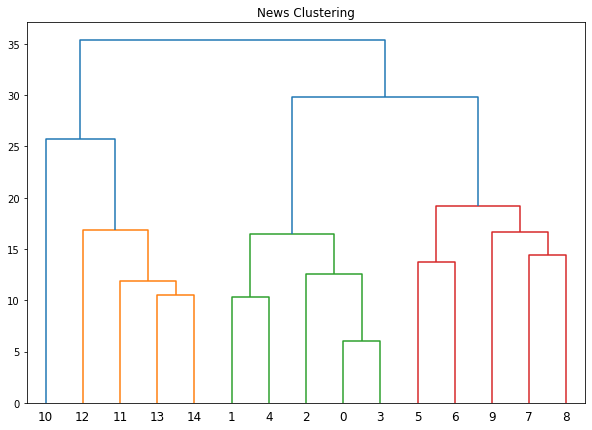

In [49]:
plt.figure(figsize=(10,7))
plt.title('News Clustering')
dend = shc.dendrogram(shc.linkage(df, method='ward'))

In [50]:
db = DBSCAN(eps=50, min_samples=5)
db.fit_predict(df)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [53]:
# sparse matrix는 머신러닝에서 학습 시 알고리즘이 잘 학습이되지 않는다.
# sparse matrix는 차원이 매우 높은 반면, 데이터는 거의 없는(0으로 채워진) matrix

# 차원을 축소 => dense matrix
# 차원축소 => PCA : 고차원데이터를 새로운 피처를 기준으로 저차원으로 차원을 축소..

In [54]:
from sklearn.decomposition import PCA

In [55]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalComponents

array([[-2.24540629e+00, -4.16745046e+00],
       [-3.61395078e+00, -9.89858090e+00],
       [-2.93263533e+00, -7.15935779e+00],
       [-2.14277248e+00, -3.75710691e+00],
       [-3.39787996e+00, -8.90428403e+00],
       [-3.45615869e+00,  9.31176021e-01],
       [-4.17263896e+00,  2.52703089e+00],
       [-6.41889302e+00,  7.24085810e+00],
       [-7.92853766e+00,  1.00112530e+01],
       [-7.16177636e+00,  8.88184555e+00],
       [ 2.02966054e+01,  4.54893214e+00],
       [ 4.18612334e+00, -5.01082789e-01],
       [ 9.93153485e+00,  1.06859945e+00],
       [ 6.58016920e+00, -3.75885212e-03],
       [ 2.47621673e+00, -8.18073411e-01]])

In [56]:
pca_df = pd.DataFrame(principalComponents, columns = ['new_x', 'new_y'])
pca_df

,new_x,new_y
0,-2.245406,-4.167450
1,-3.613951,-9.898581
2,-2.932635,-7.159358
3,-2.142772,-3.757107
4,-3.397880,-8.904284
5,-3.456159,0.931176
6,-4.172639,2.527031
7,-6.418893,7.240858
8,-7.928538,10.011253
9,-7.161776,8.881846


In [73]:
km = KMeans(n_clusters=3, init='k-means++')
km.fit(pca_df)

KMeans(n_clusters=3)

In [74]:
km.labels_

array([2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [59]:
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(pca_df)

AgglomerativeClustering(n_clusters=3)

In [60]:
agg.labels_

array([2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

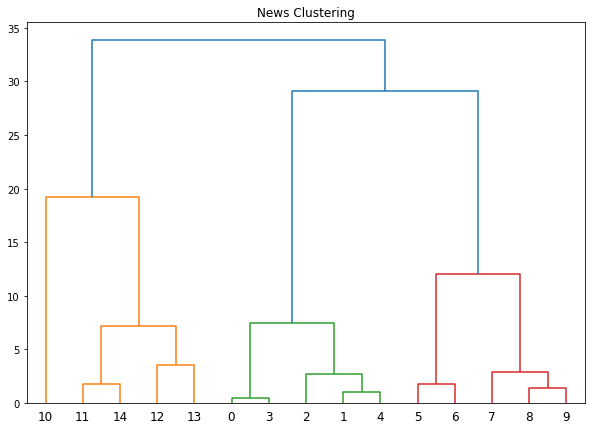

In [61]:
plt.figure(figsize=(10,7))
plt.title('News Clustering')
dend = shc.dendrogram(shc.linkage(pca_df, method='ward'))

In [64]:
db = DBSCAN(eps=50, min_samples=5)
db.fit_predict(pca_df)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [75]:
# pca transform data visualization

In [76]:
pca_df.head()

,new_x,new_y
0,-2.245406,-4.167450
1,-3.613951,-9.898581
2,-2.932635,-7.159358
3,-2.142772,-3.757107
4,-3.397880,-8.904284


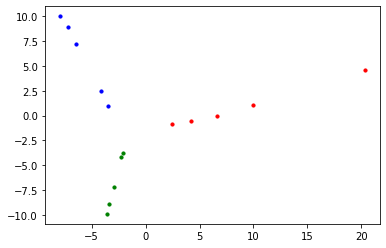

In [77]:
plt.scatter(pca_df.iloc[km.labels_ == 0, 0], pca_df.iloc[km.labels_ == 0, 1], s=10, c='red', label='유한양행')
plt.scatter(pca_df.iloc[km.labels_ == 1, 0], pca_df.iloc[km.labels_ == 1, 1], s=10, c='blue', label='라돈')
plt.scatter(pca_df.iloc[km.labels_ == 2, 0], pca_df.iloc[km.labels_ == 2, 1], s=10, c='green', label='복면가왕')

# 각 cluster별로 데이터가 구별되도록 pca가 효율적으로 차원축소를 해주었다..